<a href="https://colab.research.google.com/github/janasteinborn/MAT-421/blob/main/Homework4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MAT 421 Homework 4

Name: Jana Steinborn

## 19.1 Root Finding Problem Statement

In numerical analysis, the root-finding problem involves solving equations of the form f(x) = 0 for unknown x. These problems appear frequently in physics, engineering, and mathematics.

Example Problem:
Find the root of the function f(x) = cos(x) - x in the interval [0, 1]. This represents finding a fixed point of the cosine function.

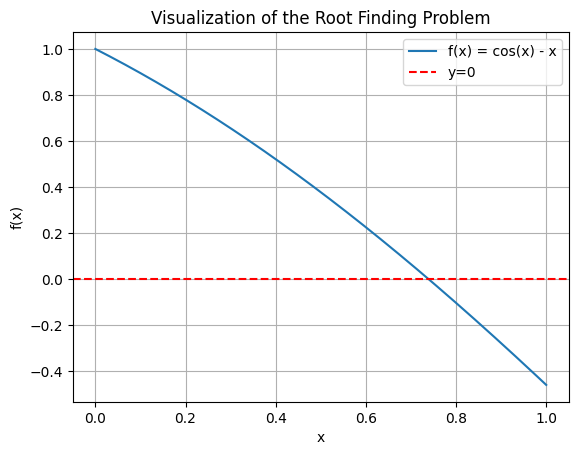

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function
f = lambda x: np.cos(x) - x

# Plot the function to visualize
x = np.linspace(0, 1, 500)
y = f(x)

plt.plot(x, y, label='f(x) = cos(x) - x')
plt.axhline(0, color='red', linestyle='--', label='y=0')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Visualization of the Root Finding Problem')
plt.legend()
plt.grid()
plt.show()


## 19.2 Tolerance

Tolerance specifies the acceptable error for numerical solutions. It ensures that iterative methods stop once a solution is sufficiently accurate.

Example:
For the equation f(x) = e^x - 2x^2, solve with a tolerance of 1e-6 to find a root in the interval [0, 1].

In [2]:
# Define the function
f = lambda x: np.exp(x) - 2*x**2

# Example tolerance demonstration
tolerance = 1e-6
print(f"Using a tolerance of {tolerance}, iterations will stop when |f(x)| < {tolerance}.")


Using a tolerance of 1e-06, iterations will stop when |f(x)| < 1e-06.


## 19.3 Bisection Method

The Bisection Method iteratively reduces the interval [a, b] that contains a root by checking the sign of the function at the midpoint. It guarantees convergence if f(a) * f(b) < 0.

Example:
Find the root of f(x) = x^2 - 3 in the interval [1, 2] with a tolerance of 1e-5.

In [3]:
def bisection_method(f, a, b, tolerance=1e-5):
    if f(a) * f(b) >= 0:
        raise ValueError("f(a) and f(b) must have opposite signs.")

    print("Iterating using the Bisection Method:")
    while (b - a) / 2 > tolerance:
        c = (a + b) / 2
        print(f"Interval: [{a:.6f}, {b:.6f}], Midpoint: {c:.6f}, f(c): {f(c):.6f}")
        if f(c) == 0:
            return c  # Exact root found
        elif f(a) * f(c) < 0:
            b = c
        else:
            a = c
    return (a + b) / 2

# Define the function
f = lambda x: x**2 - 3

# Call the method
root = bisection_method(f, 1, 2)
print(f"Root: {root:.6f}")

Iterating using the Bisection Method:
Interval: [1.000000, 2.000000], Midpoint: 1.500000, f(c): -0.750000
Interval: [1.500000, 2.000000], Midpoint: 1.750000, f(c): 0.062500
Interval: [1.500000, 1.750000], Midpoint: 1.625000, f(c): -0.359375
Interval: [1.625000, 1.750000], Midpoint: 1.687500, f(c): -0.152344
Interval: [1.687500, 1.750000], Midpoint: 1.718750, f(c): -0.045898
Interval: [1.718750, 1.750000], Midpoint: 1.734375, f(c): 0.008057
Interval: [1.718750, 1.734375], Midpoint: 1.726562, f(c): -0.018982
Interval: [1.726562, 1.734375], Midpoint: 1.730469, f(c): -0.005478
Interval: [1.730469, 1.734375], Midpoint: 1.732422, f(c): 0.001286
Interval: [1.730469, 1.732422], Midpoint: 1.731445, f(c): -0.002097
Interval: [1.731445, 1.732422], Midpoint: 1.731934, f(c): -0.000406
Interval: [1.731934, 1.732422], Midpoint: 1.732178, f(c): 0.000440
Interval: [1.731934, 1.732178], Midpoint: 1.732056, f(c): 0.000017
Interval: [1.731934, 1.732056], Midpoint: 1.731995, f(c): -0.000195
Interval: [1.73

## 19.4 Newton-Raphson Method

The Newton-Raphson Method is an efficient iterative method for root finding. It uses the derivative of the function to estimate the root.

Formula:
x_{n+1} = x_n - f(x_n) / f'(x_n)

Example:
Find the root of f(x) = x^3 - x - 2 starting from x_0 = 1 with a tolerance of 1e-6.

In [4]:
def newton_raphson(f, df, x0, tolerance=1e-6, max_iter=100):
    print("Iterating using the Newton-Raphson Method:")
    for i in range(max_iter):
        fx = f(x0)
        print(f"Iteration {i+1}: x = {x0:.6f}, f(x) = {fx:.6f}")
        if abs(fx) < tolerance:
            return x0  # Root found
        dfx = df(x0)
        if dfx == 0:
            raise ValueError("Zero derivative. No convergence.")
        x0 -= fx / dfx
    raise ValueError("Maximum iterations reached without convergence.")

# Define the function and its derivative
f = lambda x: x**3 - x - 2
df = lambda x: 3*x**2 - 1

# Call the method
root = newton_raphson(f, df, x0=1)
print(f"Root: {root:.6f}")


Iterating using the Newton-Raphson Method:
Iteration 1: x = 1.000000, f(x) = -2.000000
Iteration 2: x = 2.000000, f(x) = 4.000000
Iteration 3: x = 1.636364, f(x) = 0.745304
Iteration 4: x = 1.530392, f(x) = 0.053939
Iteration 5: x = 1.521441, f(x) = 0.000367
Iteration 6: x = 1.521380, f(x) = 0.000000
Root: 1.521380
